## AI School Africa Capstone Project: Kaggle Spaceship Titanic 
### Problem Description:

The Spaceship Titanic was an interstellar passenger liner with almost 13,000 passengers on board. The vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E; the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension.

The overall goal of this project is to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system. 

This type of problem would be considered a classification problem because the expected predictions are to be classified as either 'TRUE' (if the passenger was indeed transported to another dimension) or 'FALSE' (if not transported).

More information about this project and data used herein can be found via this link: 
https://www.kaggle.com/competitions/spaceship-titanic/overview


## Import Libraries

In [108]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

from IPython.display import display
import itertools

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


## Define Constants

In [105]:
DATA_TRAIN = "spaceship_titanic_train.csv"
DATA_TEST = "spaceship_titanic_test.csv"
NR_CLASSES = 2
LABEL_NAMES = ['True', 'False']

## Import Dataset

In [3]:
data_train = pd.read_csv(DATA_TRAIN)
data_test = pd.read_csv(DATA_TEST)

## Exploratory Data Analysis and Data Pre-processing

In [4]:
data_train.head()    # To see the shape and form of the head setion of the train-dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
data_test.head() # To see the shape and form of the head setion of the test-dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
PassengerId_X_test = data_test['PassengerId']  # Assign variable name to the 'PassengerId' column of the test data
PassengerId_X_train = data_train['PassengerId']  # Assign variable name to the 'PassengerId' column of the train data

In [7]:
data_train['Destination']

0         TRAPPIST-1e
1         TRAPPIST-1e
2         TRAPPIST-1e
3         TRAPPIST-1e
4         TRAPPIST-1e
            ...      
8688      55 Cancri e
8689    PSO J318.5-22
8690      TRAPPIST-1e
8691      55 Cancri e
8692      TRAPPIST-1e
Name: Destination, Length: 8693, dtype: object

In [8]:
data_train['Destination'][5000:5007]

5000    55 Cancri e
5001    55 Cancri e
5002            NaN
5003    TRAPPIST-1e
5004    TRAPPIST-1e
5005    TRAPPIST-1e
5006    TRAPPIST-1e
Name: Destination, dtype: object

In [9]:
data_train['Cabin'][5000:5007]

5000    C/168/P
5001    C/168/P
5002    D/167/P
5003    E/333/P
5004    E/334/P
5005    C/169/P
5006    D/168/P
Name: Cabin, dtype: object

In [10]:
data_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [11]:
data_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Data Cleaning || Checking for Missing Values
View all the unique features in respective columns and tell if there are any empty cells

In [12]:
#set(data_train['CryoSleep']) # To view all the unique features in this colunm as well as to tell if there are empty cells

In [13]:
set(data_train['HomePlanet']) # To view all the unique features in this colunm as well as to tell if there are empty cells

{'Earth', 'Europa', 'Mars', nan}

In [14]:
any(data_train['HomePlanet'] == 'Earth')

True

In [145]:
#set(data_train['Cabin'])

In [16]:
len(set(data_train['Cabin']))

6561

In [17]:
set(data_train['Destination']) # To view all the unique features in this colunm as well as to tell if there are empty cells

{'55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan}

In [18]:
set(data_train['VIP'])

{False, True, nan}

In [19]:
data_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Dropping columns that would have little or no impact on final predictions

In [20]:
data_train = data_train.drop(['PassengerId', 'Name', 'Cabin'], axis=1)
data_test = data_test.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [21]:
data_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [22]:
data_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


### Applying LabelEncoder() to transform non-numeric labels to numeric labels

In [23]:
le = LabelEncoder()
#ohe = OneHotEncoder()

In [24]:
data_train['CryoSleep'] = le.fit_transform(data_train['CryoSleep'])
data_train['VIP'] = le.fit_transform(data_train['VIP'])
data_train['Transported'] = le.fit_transform(data_train['Transported'])
data_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


### Passengers that were (or were not) transported - Visualised (Pie Charts)

In [25]:
transported_psgn = data_train['Transported'].value_counts()[1]
nr_transported_psgn = data_train['Transported'].value_counts()[0]
transported_psgn, nr_transported_psgn

(4378, 4315)

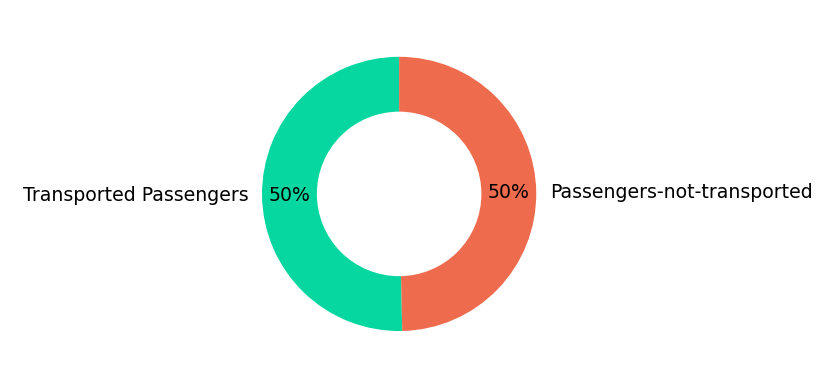

In [26]:
category_names = ['Transported Passengers', 'Passengers-not-transported']
sizes = [transported_psgn, nr_transported_psgn]
custom_colours = ['#06d6a0','#ee6c4d']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.show()

# plt.figure(figsize=(2, 2), dpi=227)
# plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
#        autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.1])
# plt.show()

### Passengers that paid for special VIP service during the voyage - Visualised (Pie Charts)

In [27]:
VIP_psgn = data_train['VIP'].value_counts()[1]
Non_VIP_psgn = data_train['VIP'].value_counts()[0]
VIP_psgn, Non_VIP_psgn

(199, 8291)

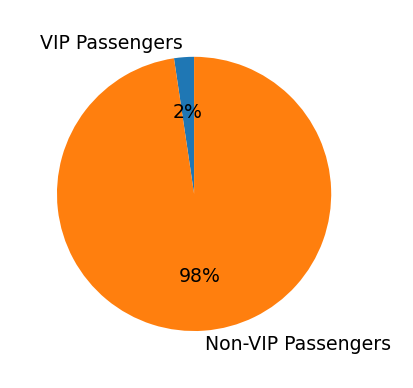

In [28]:
category_names = ['VIP Passengers', 'Non-VIP Passengers']
sizes = [VIP_psgn, Non_VIP_psgn]
custom_colours = ['#ee6c4d','#ee6c4d']

# plt.figure(figsize=(2, 2), dpi=227)
# plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
#        autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8)

# # draw circle
# centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
# plt.gca().add_artist(centre_circle)

# plt.show()

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%')
plt.show()

In [29]:
data_test['CryoSleep'] = le.fit_transform(data_test['CryoSleep'])
data_test['VIP'] = le.fit_transform(data_test['VIP'])
data_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
3,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1,TRAPPIST-1e,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,Earth,0,TRAPPIST-1e,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,Mars,1,55 Cancri e,NaN,0,0.0,0.0,0.0,0.0,0.0
4275,Europa,0,NaN,NaN,0,0.0,2680.0,0.0,0.0,523.0


In [30]:
set(data_train['HomePlanet']), set(data_train['Destination'])

({'Earth', 'Europa', 'Mars', nan},
 {'55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan})

In [31]:
np.max(data_train['VRDeck']), np.max(data_train['FoodCourt']), np.max(data_train['ShoppingMall'])

(24133.0, 29813.0, 23492.0)

In [32]:
np.max(data_train['RoomService']), np.max(data_train['Spa'])

(14327.0, 22408.0)

In [33]:
# mct = make_column_transformer(
#     (MinMaxScaler(), ['VRDeck', 'FoodCourt', 'ShoppingMall', 'RoomService', 'Spa']),
#     (OneHotEncoder(handle_unknown="ignore"), ['HomePlanet', 'Destination'])
# )

In [34]:
data_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [35]:
y = data_train['Transported'] #Create y-label

In [36]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [37]:
X = data_train.drop(['Transported'], axis=1) # Drop the y-label column from the dataset

In [38]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0


### Applying fillna() to fill all 'NaN' values using a specified method; in this case - mean()

In [39]:
X['VRDeck'].fillna(X['VRDeck'].mean(), inplace=True)
X['Spa'].fillna(X['Spa'].mean(), inplace=True)
X['ShoppingMall'].fillna(X['ShoppingMall'].mean(), inplace=True)
X['FoodCourt'].fillna(X['FoodCourt'].mean(), inplace=True)
X['RoomService'].fillna(X['RoomService'].mean(), inplace=True)
X['Age'].fillna(X['Age'].mean(), inplace=True)

#### Checking to see if there are still empty cells after using fillna()  above

In [40]:
X['ShoppingMall'].isnull().values.any()

False

The 'HomePlanet', and 'Destination' columns have two or more unique values and hence LabelEncoder() can not be used to transform them to numeric labels. Alternatively, OneHotEncoder() is applied thus

### Applying OneHotEncoder() to encode and transform the 'HomePlanet', and 'Destination' columns

In [41]:
X['HomePlanet'] = le.fit_transform(X['HomePlanet'])
X['Destination'] = le.fit_transform(X['Destination'])

In [42]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [43]:
np.max(X['Destination'])

3

In [44]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [45]:
 #ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), data_train['HomePlanet'])], remainder='passthrough')

In [46]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2])], remainder='passthrough')

In [47]:
X = np.array(ct.fit_transform(X))

In [48]:
X[0:5]

array([[0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.900e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.400e+01, 0.000e+00, 1.090e+02,
        9.000e+00, 2.500e+01, 5.490e+02, 4.400e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 5.800e+01, 1.000e+00, 4.300e+01,
        3.576e+03, 0.000e+00, 6.715e+03, 4.900e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.300e+01, 0.000e+00, 0.000e+00,
        1.283e+03, 3.710e+02, 3.329e+03, 1.930e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.600e+01, 0.000e+00, 3.030e+02,
        7.000e+01, 1.510e+02, 5.650e+02, 2.000e+

Standardization of a dataset is a common requirement for many machine learning estimators. They might behave badly if the individual features do not look like standard normally distributed data. Hence, StandardScaler() is applied next. This is even more important since Tensorflow would be used for modelling 

In [49]:
sc = StandardScaler()

In [50]:
X = sc.fit_transform(X)

In [51]:
X

array([[-1.06061696,  1.754795  , -0.50366411, ..., -0.29081703,
        -0.27666342, -0.26902263],
       [ 0.94284745, -0.56986714, -0.50366411, ..., -0.24896783,
         0.2115053 , -0.23019432],
       [-1.06061696,  1.754795  , -0.50366411, ..., -0.29081703,
         5.69428913, -0.22578201],
       ...,
       [ 0.94284745, -0.56986714, -0.50366411, ...,  2.84285059,
        -0.27577423, -0.26902263],
       [-1.06061696,  1.754795  , -0.50366411, ..., -0.29081703,
         0.03722284,  2.58574044],
       [-1.06061696,  1.754795  , -0.50366411, ..., -0.29081703,
        -0.27666342, -0.25843309]])

In [52]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

### Split data into Training and Validation set

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
X_train.shape, y_train.shape

((6954, 16), (6954,))

In [55]:
X_val.shape, y_val.shape

((1739, 16), (1739,))

In [56]:
X.shape

(8693, 16)

### Model 1: Using Keras
####  Model 1.1

In [57]:
model_1 = tf.keras.Sequential()

In [58]:
model_1.add(tf.keras.layers.Dense(units=6, activation='relu'))
model_1.add(tf.keras.layers.Dense(units=6, activation='relu'))
model_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [59]:
model_1

In [60]:
model_1.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [61]:
model_1.fit(X_train, y_train, batch_size=32, epochs=80)

Epoch 1/80
218/218 [==============================] - 1s 1ms/step - loss: 0.6593 - accuracy: 0.6494
Epoch 2/80
218/218 [==============================] - 0s 1ms/step - loss: 0.5614 - accuracy: 0.7150
Epoch 3/80
218/218 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.7578
Epoch 4/80
218/218 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7692
Epoch 5/80
218/218 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.7745
Epoch 6/80
218/218 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.7830
Epoch 7/80
218/218 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.7816
Epoch 8/80
218/218 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.7865
Epoch 9/80
218/218 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7875
Epoch 10/80
218/218 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.7890

#### Model 1.2: With more Dense Units

In [62]:
model_2 = tf.keras.Sequential()

In [104]:
model_2.add(tf.keras.layers.Dense(units=10, activation='relu')) ## Adding the first hidden layer
model_2.add(tf.keras.layers.Dense(units=10, activation='relu'))  ## Adding the second hidden layer
model_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) ## The output layer
model_2

In [64]:
model_2.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [65]:
model_2.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
218/218 [==============================] - 1s 1ms/step - loss: 0.6625 - accuracy: 0.6034
Epoch 2/100
218/218 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.7222
Epoch 3/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7716
Epoch 4/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.7785
Epoch 5/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.7866
Epoch 6/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.7905
Epoch 7/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.7889
Epoch 8/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7913
Epoch 9/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.7931
Epoch 10/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4341 - accura

218/218 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8051
Epoch 82/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8046
Epoch 83/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8039
Epoch 84/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8046
Epoch 85/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8036
Epoch 86/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8044
Epoch 87/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8034
Epoch 88/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8027
Epoch 89/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8046
Epoch 90/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 

In [66]:
# def model(X_train, y_train):
#     model_4 = tf.keras.Sequential()
#     model_4.add(tf.keras.layers.Dense(units=6, activation='relu'))
#     model_4.add(tf.keras.layers.Dense(units=6, activation='relu'))
#     model_4.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#     model_4.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
#     model_4.fit(X_train, y_train, batch_size=32, epochs=80)
#     return model_4

# model_4 = model(X_train, y_train)

### Model Evaluation

In [67]:
#the 'y_pred' variable stores the results of the predictions on X_val
y_pred = np.squeeze((model_1.predict(X_val)>0.5)) 
y_pred

array([False,  True, False, ...,  True, False, False])

In [68]:
y_pred*1

array([0, 1, 0, ..., 1, 0, 0])

In [69]:
y_val_keras = np.array(y_val.to_list())
y_val_keras = np.array(y_val_keras.tolist())
y_val_keras

array([1, 1, 0, ..., 1, 0, 1])

In [72]:
y_pred = y_pred*1
y_pred = np.array(y_pred.tolist())

In [73]:
## Chcking to see how well our model perfomrs on validation data

nr_correct = (y_pred==y_val).sum()
nr_incorrect = y_pred.shape[0] - nr_correct
print(f'The number of correct prediction is:',nr_correct)
print(f'The number of incorrect prediction is:',nr_incorrect)

The number of correct prediction is: 1361
The number of incorrect prediction is: 378


In [74]:
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[631 232]
 [146 730]]


In [111]:
nr_rows, nr_cols = cm.shape[0], cm.shape[1]
nr_rows, nr_cols

(2, 2)

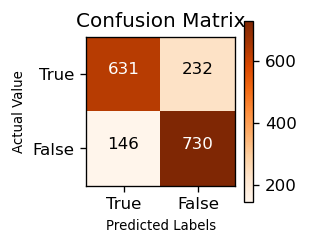

In [122]:
# cm = confusion_matrix(y_val, y_pred)
# print(cm)

plt.figure(figsize=(2,2), dpi=120)
plt.imshow(cm, cmap=plt.cm.Oranges)

plt.title('Confusion Matrix', fontsize=12)
plt.ylabel('Actual Value', fontsize=8)
plt.xlabel('Predicted Labels', fontsize=8)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, cm[i,j], 
             horizontalalignment='center',
             color='white' if cm[i,j]>cm.max()/(1.5) else 'black')

plt.show()

In [75]:
print(f'Accuracy score:', accuracy_score(y_val, y_pred))

Accuracy score: 0.7826336975273146


### Making Predictions on the Validation Data

In [76]:
model_1.predict(X_val)

array([[0.49794063],
       [0.94037294],
       [0.19511095],
       ...,
       [0.7775849 ],
       [0.05828047],
       [0.34052435]], dtype=float32)

In [77]:
model_2.predict(X_val)

array([[0.40153706],
       [0.7930279 ],
       [0.24217734],
       ...,
       [0.8108089 ],
       [0.06974468],
       [0.2709212 ]], dtype=float32)

In [82]:
model_1.predict(X_val).shape, y_val.shape

((1739, 1), (1739,))

In [80]:
y_val

3601    1
6057    1
2797    0
7110    0
8579    1
       ..
864     0
3780    0
6046    1
170     0
2519    1
Name: Transported, Length: 1739, dtype: int64

In [83]:
model_1.predict(X_val)>0.5

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [85]:
y_val

3601    1
6057    1
2797    0
7110    0
8579    1
       ..
864     0
3780    0
6046    1
170     0
2519    1
Name: Transported, Length: 1739, dtype: int64

In [86]:
#np.squeeze((y_pred*1).reshape(len(y_pred),1))

In [87]:
#pd.DataFrame({'y_pred': y_pred, 'y_val':y_val})

### Carry out Prediction on X_test (the given X_test)

In [89]:
data_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
3,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1,TRAPPIST-1e,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,Earth,0,TRAPPIST-1e,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,Mars,1,55 Cancri e,NaN,0,0.0,0.0,0.0,0.0,0.0
4275,Europa,0,NaN,NaN,0,0.0,2680.0,0.0,0.0,523.0


### Pre-process the test data
Similar to the techniques applies on the training dataset, the given test dataset is also cleaned, and pre-processed

In [90]:
data_test['VRDeck'].fillna(data_test['VRDeck'].mean(), inplace=True)
data_test['Spa'].fillna(data_test['Spa'].mean(), inplace=True)
data_test['ShoppingMall'].fillna(data_test['ShoppingMall'].mean(), inplace=True)
data_test['FoodCourt'].fillna(data_test['FoodCourt'].mean(), inplace=True)
data_test['RoomService'].fillna(data_test['RoomService'].mean(), inplace=True)
data_test['Age'].fillna(data_test['Age'].mean(), inplace=True)

In [91]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2])], remainder='passthrough')
data_test_1 = np.array(ct.fit_transform(data_test))

In [92]:
data_test_1

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.823e+03,
        0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        5.230e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

### Predictions on the given test data

In [93]:
X_test_predict = model_1.predict(data_test_1)>0.5
X_test_predict

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [94]:
predicted_X_test = np.array(X_test_predict)
np.squeeze(predicted_X_test) 

array([ True, False,  True, ...,  True,  True,  True])

### Results

In [141]:
result = pd.DataFrame({'PassengerId': PassengerId_X_test, 'Transported':np.squeeze(predicted_X_test)})
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [96]:
result.shape

(4277, 2)

In [97]:
import os  
os.makedirs('folder/subfolder', exist_ok=True)
result.to_csv('result_spaceship.csv', index=False)

### Model 2: Using LinearRegression() model

In [98]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

LinearRegression()

In [134]:
lin_regr_predict_X_val = lin_regr.predict(X_val)
lin_regr_predict_X_val.shape

(1739,)

In [139]:
#r-squared for training and test datasets
print('Training data r-squared:', lin_regr.score(X_train, y_train))
print('Validation data r-squared:', lin_regr.score(X_val, y_val))

Training data r-squared: 0.31606525189880563
Validation data r-squared: 0.30885939129128637


Here, we see that the LinearRegression() model is not a good model for the given problem given the poor scores on the Train and Validation data. Hence, we check out a third model, this time, we go with the LogisticRegression() model

### Model 3: Using the LogisticRegression() model

In [100]:
regr = LogisticRegression(random_state=0).fit(X_train, y_train)
print('Training data r-squared:', regr.score(X_train, y_train))

Training data r-squared: 0.7886108714408974


In [101]:
print('Validation data r-squared:', regr.score(X_val, y_val))

Validation data r-squared: 0.7751581368602645


In [102]:
predict_X_val = regr.predict(X_val)
predict_X_val.shape

(1739,)

In [103]:
predict_X_test_log = regr.predict(data_test_1)
predict_X_test_log>0.5

array([False, False, False, ..., False,  True, False])

[[628 235]
 [156 720]]


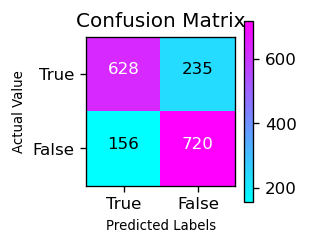

In [129]:
cm_logic = confusion_matrix(y_val, predict_X_val)
print(cm_logic)

plt.figure(figsize=(2,2), dpi=120)
plt.imshow(cm_logic, cmap=plt.cm.cool)

plt.title('Confusion Matrix', fontsize=12)
plt.ylabel('Actual Value', fontsize=8)
plt.xlabel('Predicted Labels', fontsize=8)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, cm_logic[i,j], 
             horizontalalignment='center',
             color='white' if cm_logic[i,j]>cm_logic.max()/(1.5) else 'black')

plt.show()

### Conclusion

Model 1 (Keras) and Model 3 (LogisticRegression) seem to do pretty well and certainly much better than the LinearRegression model. Furthermore, using the confusion matrix for Keras and LogisticRegression models, we see that the number of True positives and the number of True negatives are fairly high (which is desirable), and are quite comparable. However, the Keras model is my choice model because it has a higher number of True positives (TP:631) as well as a higher number of True negatives (TN:730) when compared to Model 3 (LogisticRegression) which has True positives (TP:628) and True negatives (TN:720).

### Final Results obtained via the Keras Model

In [144]:
result = pd.DataFrame({'PassengerId': PassengerId_X_test, 'Transported':np.squeeze(predicted_X_test)})
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
